In [1]:
import numpy as np
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
%run ./Generate_Network_Topology.ipynb

In [3]:
%run ./Generating_CRs.ipynb 

In [4]:
# %run ./Priority_Queue.ipynb # No need, the method has been incorporated in the class CR

In [5]:
%run ./Links.ipynb

In [6]:
edges = [ (1, 2, 1100),  #Edge between Node 0 and Node 1
             (2, 3, 1600), #Intermediate Edge between Node 1 and Node 2
             (1, 3, 600), # Edge between Node 0 and Node 2
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (1, 4, 1000),  # Edge between Node 0 and Node 3
             (4, 5, 600), # Edge between Node 3 and Node 4
             (5, 7, 800), # Intermediate edge between Node 4 and Node 6
             (7, 8, 700), # Intermediate edge between Node 6 and Node 7
             (2, 8, 1500), # Edge between Node 1 and Node 7
             (4, 9, 1500), # Edge Betweeen Node 3 and Node 8
             (9, 12, 800), # Edge Betweeen Node 8 and Node 11
             (8, 10, 700), # Edge Betweeen Node 7 and Node 9
             (10, 12, 500), # Edge Betweeen Node 9 and Node 11
             (9, 14, 800), # Edge Betweeen Node 8 and Node 13
             (10, 14, 500), # Edge Betweeen Node 9 and Node 13
             (12, 13, 300), # Edge Betweeen Node 11 and Node 12
             (13, 14, 300), # Edge Betweeen Node 12 and Node 13
             (3, 6, 1000), # Edge Betweeen Node 2 and Node 5
             (6, 5, 1100), # Edge Betweeen Node 5 and Node 4
             (6, 13, 2000), # Edge Betweeen Node 5 and Node 12
             (6, 11, 1200), # Edge Betweeen Node 5 and Node 10
             (10, 11, 900) # Edge Betweeen Node 9 and Node 10]
        ]

# Step 1:
Initialize the network status and parameters, and generate a set of CR, i.e., X CRs.
## Step 2(a) : 
For each CR, we set a SL (incorporated in Step 1)

numNodes:  14


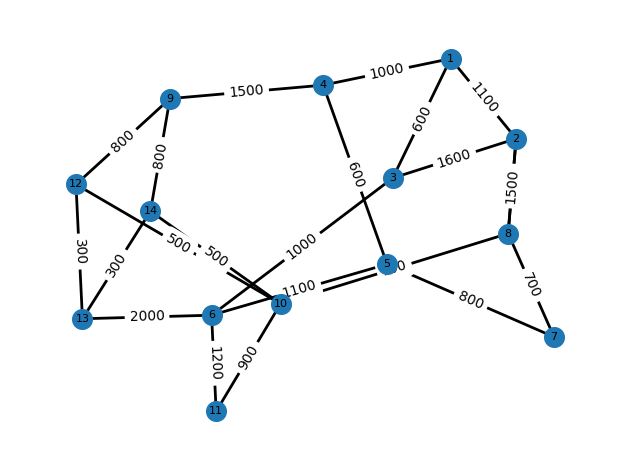

In [7]:
g_nsfnet = create_topology(edges) # Creates the nsfnet topology

(links, indices, unordered_indices) = Links.initialize_links(edges) # Initializes the links structure with weights

numNodes = len(g_nsfnet)
X = 10
CRs = CR.generate_crs(X) # Generating X Crs. 

In [8]:
# Print the array of CR instances
print("CR info : ")
for cr in CRs:
    cr.display_info()

# Print link info
'''
for link in links[indices]:    # Will display double the number of actual edges, due to ordered pair
   link.display_info()
'''
print("Link info : ")
Links.display_all_links()

CR info : 
CR: Index : 0, Source Node =13, Destination Node=11, Security Level=high, status=initialized
CR: Index : 1, Source Node =10, Destination Node=1, Security Level=high, status=initialized
CR: Index : 2, Source Node =2, Destination Node=9, Security Level=high, status=initialized
CR: Index : 3, Source Node =10, Destination Node=13, Security Level=medium, status=initialized
CR: Index : 4, Source Node =3, Destination Node=1, Security Level=high, status=initialized
CR: Index : 5, Source Node =4, Destination Node=6, Security Level=low, status=initialized
CR: Index : 6, Source Node =2, Destination Node=12, Security Level=medium, status=initialized
CR: Index : 7, Source Node =13, Destination Node=6, Security Level=low, status=initialized
CR: Index : 8, Source Node =5, Destination Node=1, Security Level=medium, status=initialized
CR: Index : 9, Source Node =11, Destination Node=3, Security Level=low, status=initialized
Link info : 
Link: Nodes =(1, 2), lambda_tdc_count=47, lambda_q1_cou

# Step 2(b) :
use the K-SP algorithm to obtain the K candidate transmission paths. 
The path with the shortest distance is selected as the transmission path of QSC and PIC.

In [9]:
cr = CRs[0]    # Taking only 1 cr for now. Later it can be converted to for loop to loop over all CRs

k_sp = cr.k_sp(g_nsfnet, 10)    # Taking k = 10
candidate_path = k_sp[0][0]    # Path with the shortest distance becomes the transmission path

In [10]:
# Displaying all the K shortest paths along with their path costs
for i, (path, cost) in enumerate(k_sp):
    print(f"Path {i + 1}: {path}, Cost: {cost}")

# Displaying the candidate path
print(f"Candidate path : {candidate_path}")

Path 1: [13, 12, 10, 11], Cost: 1700
Path 2: [13, 14, 10, 11], Cost: 1700
Path 3: [13, 6, 11], Cost: 3200
Path 4: [13, 12, 9, 14, 10, 11], Cost: 3300
Path 5: [13, 14, 9, 12, 10, 11], Cost: 3300
Path 6: [13, 12, 10, 8, 7, 5, 6, 11], Cost: 5300
Path 7: [13, 14, 10, 8, 7, 5, 6, 11], Cost: 5300
Path 8: [13, 12, 9, 4, 5, 6, 11], Cost: 5500
Path 9: [13, 14, 9, 4, 5, 6, 11], Cost: 5500
Path 10: [13, 6, 5, 7, 8, 10, 11], Cost: 6200
Candidate path : [13, 12, 10, 11]


In [11]:
# Allocate to TDC and QSC

In [12]:
# Giing some manual allocation for testing
links[13, 12].update_link(1, 1)
links[6, 3].update_link(1, 3)
links[10, 11].update_link(1, 7)

The updated q1 resources for (12, 13) are : [ True False  True  True  True  True  True  True]
The updated q1 resources for (3, 6) are : [ True  True  True False  True  True  True  True]
The updated q1 resources for (10, 11) are : [ True  True  True  True  True  True  True False]


In [13]:
# if no time slot is available, we move on to the next candidate path
cr = CRs[0]
print(cr.index)
attempt = Links.FF(candidate_path, cr)

0
The updated q1 resources for (12, 13) are : [False False  True  True  True  True  True  True]
The updated q1 resources for (10, 12) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (10, 11) are : [False  True  True  True  True  True  True False]
allocated ts 0 successfully to CR 0


# Step3：
If a CR is successfully allocated to TDC & QSC, turn to Step4; otherwise, this CR blocks. If an event is waiting for a CR(X=0), turn to Step9


In [14]:
if attempt:
    print(f"CR status : {cr.status}, on path :", candidate_path)
else :
    print("CR couldn't be successfully allocated on path :", candidate_path)

CR status : allocated, on path : [13, 12, 10, 11]


In [15]:
# Displaying the resources after allocation
path = candidate_path
for s, d in zip(path, path[1:]):
    links[s, d].display_info()
    #links[s, d].wl_info()

Link: Nodes =(12, 13), lambda_tdc_count=46, lambda_q1_count=6, lambda_q2_count=10, lambda_q3_count=12
Link: Nodes =(10, 12), lambda_tdc_count=46, lambda_q1_count=7, lambda_q2_count=10, lambda_q3_count=12
Link: Nodes =(10, 11), lambda_tdc_count=46, lambda_q1_count=6, lambda_q2_count=10, lambda_q3_count=12


# Step 4 :
Create three queues with different priorities in PQ={𝑪𝑹1, 𝑪𝑹0, 𝑪𝑹−1}, i.e., 𝑪𝑹1, 𝑪𝑹0 and 𝑪𝑹−1. Each CR has a specific SL, sl. 
Place the CR of the corresponding SL in the corresponding priority. If this CR belongs to the high-level priority queue, 𝑪𝑹1, then turn to Step 5. 
If this CR belongs to mid-level priority queue 𝑪𝑹0 or low-level priority queue, 𝑪𝑹−1, turn to Step 6.


In [16]:
PQ = CR.create_priority_queue()

In [17]:
CR.display_all(PQ)

CR: Index : 0, Source Node =13, Destination Node=11, Security Level=high, status=allocated
CR: Index : 1, Source Node =10, Destination Node=1, Security Level=high, status=initialized
CR: Index : 2, Source Node =2, Destination Node=9, Security Level=high, status=initialized
CR: Index : 4, Source Node =3, Destination Node=1, Security Level=high, status=initialized
CR: Index : 3, Source Node =10, Destination Node=13, Security Level=medium, status=initialized
CR: Index : 6, Source Node =2, Destination Node=12, Security Level=medium, status=initialized
CR: Index : 8, Source Node =5, Destination Node=1, Security Level=medium, status=initialized
CR: Index : 5, Source Node =4, Destination Node=6, Security Level=low, status=initialized
CR: Index : 7, Source Node =13, Destination Node=6, Security Level=low, status=initialized
CR: Index : 9, Source Node =11, Destination Node=3, Security Level=low, status=initialized


# Combined

Input the number of CRs to be generates


None 10


numNodes:  14


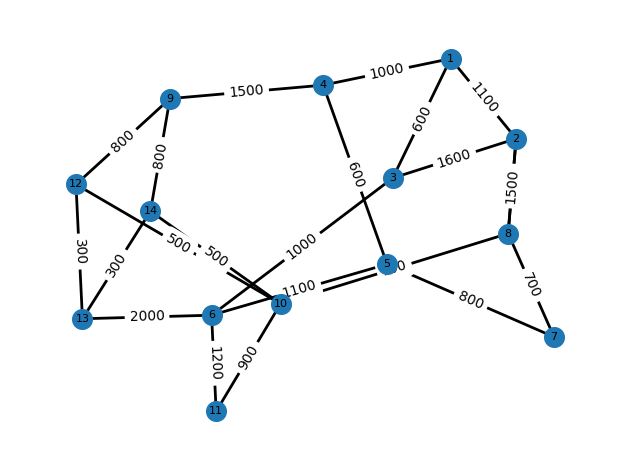


Attempting allocation of CR 0 on path : [3, 1, 4, 9])
The updated q1 resources for (1, 3) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (1, 4) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (4, 9) are : [False  True  True  True  True  True  True  True]
allocated ts 0 successfully to CR 0
CR 0 status : allocated, on path : [3, 1, 4, 9]

Attempting allocation of CR 2 on path : [11, 10, 12, 9])
The updated q1 resources for (10, 11) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (10, 12) are : [False  True  True  True  True  True  True  True]
The updated q1 resources for (9, 12) are : [False  True  True  True  True  True  True  True]
allocated ts 0 successfully to CR 2
CR 2 status : allocated, on path : [11, 10, 12, 9]

Attempting allocation of CR 6 on path : [8, 2, 1])
The updated q1 resources for (2, 8) are : [False  True  True  True  True  True  True  True]
The updated q1 

In [ ]:
X = int(input(print("Input the number of CRs to be generates")))
while X:
    
    # Parameters used later
    k = 10
    
    
    # Creates the nsfnet topology
    g_nsfnet = create_topology(edges) 
    numNodes = len(g_nsfnet)
    
    # Initializes the links structure with weights
    (links, indices, unordered_indices) = Links.initialize_links(edges) 

    # Generating X Crs
    CRs = CR.generate_crs(X) 

    ########################################################################
    
    # Creating the priority Queue
    PQ_all = CR.create_priority_queue('all')

    for i in [1, 2, 3]: 
        # Allocating Resources to high priority CRs
        for cr in PQ_all[i]:  
            
            k_sp = cr.k_sp(g_nsfnet, k)    # Taking k = 10. Gives us [path][weight]
            # Finding the path to be followed
            for i in range(k):    # Using the next k-sp in case the CR couldn't be allocated to the previous one
                candidate_path = k_sp[i][0]    # Path with the lowest weight becomes the transmission path
                print(f"\nAttempting allocation of CR {cr.index} on path : {candidate_path})")
            
                # Attempting to allocate resources
                success = Links.FF(candidate_path, cr)
                print(f"CR {cr.index} status : {cr.status}, on path :", candidate_path)
                # Checking if the path was allocated or not
                if success:
                    break  
    
            X = X-1
    
        print(f"\nAll {cr.sl} priority CRs dealt with:")
        CR.display_all(PQ_all[1])
    
    # Allocating resources to medium and low
    # Need to write code for ASLC

    run = input(print("Want to continue?(y/n)"))
    
    if run == 'y':
        X = int(input(print("Input the number of CRs to be generates")))
    
print("Simulation Ended")